# Cap. 2 - Núcleo da Linguagem Python, Parte I

##**Funções**

Funções nada mais são do que um conjunto de códigos agrupados e que podem ser executadas repetidas vezes. Funções servem para encapsular códigos para uso recorrente, além de contribuírem para simplificar programas, dividindo problemas complexos em partes mais simplificadas.

Para definir uma função usamos:



```
def NOME_DA_FUNCAO(ARG1,...):
   ...
```
Por exemplo:



In [ ]:
def quadrado(x):
    return x**2

In [ ]:
x = quadrado(2)

In [ ]:
x

Funções podem retornar nada ou mais de um valor. Por exemplo:

In [ ]:
def print_quadrado(x):
    print(x**2)

In [ ]:
print_quadrado(2)

In [ ]:
y=print_quadrado(2)

In [ ]:
y is None

In [ ]:
import math

def raizes(a,b,c):
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2


In [ ]:
raizes(1., -1., -6.)

In [ ]:
#o que acontece?
raizes(1., 1., 6)

**Docstrings**

São um texto que explica como usar a função. Existem várias maneiras tradicionais de usá-las:

In [ ]:
import math

def raizes(a,b,c):
    """Retorna a raíz de $a x^2+bx+c=0$."""
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2

In [ ]:
??raizes

In [ ]:
?raizes

In [ ]:
raizes.__doc__

Além disso existem alguns templates que podem ser seguidos.

[**Estilo Google**](https://github.com/google/styleguide/blob/gh-pages/pyguide.md#38-comments-and-docstrings)



```
"""
This is an example of Google style.

Args:
    param1: This is the first param.
    param2: This is a second param.

Returns:
    This is a description of what is returned.

Raises:
    KeyError: Raises an exception.
"""
```

[**Estilo Numpydoc**](https://numpydoc.readthedocs.io/en/latest/)



```
"""
My numpydoc description of a kind
of very exhaustive numpydoc format docstring.

Parameters
----------
first : array_like
    the 1st param name `first`
second :
    the 2nd param
third : {'value', 'other'}, optional
    the 3rd param, by default 'value'

Returns
-------
string
    a value in a string

Raises
------
KeyError
    when a key error
OtherError
    when an other error
"""
```



Mostrar um exemplo no [*ordpy*](https://github.com/arthurpessa/ordpy).

**Argumentos**

Na função *raiz(a,b,c)*, *a*, *b* e *c* são chamados argumentos posicionais pois eles foram passados em ordem

In [ ]:
def raizes(a,b,c):
    """Retorna a raíz de $a x^2+bx+c=0$."""
    delta = b**2 -4*a*c
    r1 = (-b+math.sqrt(delta))/(2*a)
    r2 = (-b-math.sqrt(delta))/(2*a)

    return r1, r2

In [ ]:
raizes(1., -1., -6.)

Podemos mudar isso, ao fazer:

In [ ]:
raizes(a=1., c=-6., b=-1.)

In [ ]:
raizes(b=-1., a=1., c=-6.)

Nesse caso, dizemos que estamos usando argumentos palavras-chave.

É possível misturar os dois tipo:

In [ ]:
raizes(1., c=-6., b=-1.)

(3.0, -2.0)

Porém, argumentos posicionais deve ser sempre os primeiros:

In [ ]:
raizes(b=-1., 1., c=-6.)

SyntaxError: ignored

**Argumentos com valor padrão ou argumentos opcionais**

Ao definir a função, se especificarmos o valor do argumento, esse valor será usado por padrão. Por exemplo:

In [ ]:
def imprime_comprimento(valor, unidade='metros'):
    return f'O comprimento é {valor:.2f} {unidade}'

In [ ]:
imprime_comprimento(10)

'O comprimento é 10.00 metros'

In [ ]:
imprime_comprimento(10,'quilômetros')

'O comprimento é 10.00 quilômetros'

Argumentos *default* podem ser misturados, mas devem vir por último na definição da função.

In [ ]:
def imprime_comprimento(valor=1, unidade):
    return f'O comprimento é {valor:.2f} {unidade}'

SyntaxError: ignored

Esses argumentos são definidos na primeira execução da função. Por exemplo:

In [ ]:
unidade_padrao = 'metros'
def imprime_comprimento(valor, unidade=unidade_padrao):
    return f'O comprimento é {valor:.2f} {unidade}'

In [ ]:
imprime_comprimento(10)

'O comprimento é 10.00 metros'

In [ ]:
unidade_padrao = 'km'
imprime_comprimento(10)

'O comprimento é 10.00 metros'

Note que ao mudar a variável *unidade_padrao* o argumento default não muda. Lembre-se, uma vez mais, que ao usar '=' um novo objeto é alocado na memória e as referências para o antigo objeto permanecem.

Porém, vale um alerta no caso de argumentos default mutáveis (listas, por exemplo):

In [ ]:
def func(alist = []):
    alist.append(7)
    return alist

In [ ]:
func()

[7]

In [ ]:
func()

[7, 7]

In [ ]:
func()

[7, 7, 7]

Note que a cada execução, *alist* é incrementada. O método *.append* não cria uma nova lista.

**Escopo de variáveis**

Ao definir uma variável dentro de uma função, essa variável é dita *local* e fica disponível apenas dentro da função:

In [ ]:
b = 6 #exemplo de variável global

def func():
    a = 5 #exemplo de variável local
    print('a =', a,' b =', b)

In [ ]:
func()

a = 5  b = 6


In [ ]:
a

NameError: ignored

Mesmo se você definir uma nova *a* de forma global, a variável *a* dentro da função não muda:

In [ ]:
a = 6

In [ ]:
a

6

In [ ]:
func()

a = 5  b = 6


O Python considera o escopo na ordem:



1.   **L**ocal;
2.   **E**nclosing (funções dentro de funções);
3.   **G**lobal;
4.   **B**uilt-ins (nomes reservados no Python).

Essas regras normalmente são denominadas: **LEGB**.


**Modificadores *global* e *nonlocal***



*   global VAR: define uma variável de escopo global;
*   nonlocal VAR: define uma variável de escopo *enclosing*.

Por exemplo,


In [ ]:
def func1():
    print(x)

In [ ]:
x = 4
func1()

4


In [ ]:
def func2():
    x = x + 1

In [ ]:
#x não pode ser modificada por estar definida no escopo global
func2()

UnboundLocalError: ignored

In [ ]:
def func2():
    global x #isso faz com que o Python use o x global
    x = x + 1

In [ ]:
func2()

In [ ]:
x

5

**Passando argumentos para funções**

Em muitas linguagens (C e C++, por exemplo) existe uma distinção entre passar um argumento para função:

* por valor (*by value*)
* ou por referência (*by reference* ou ainda por ponteiros)

Em Python essa distinção não faz sentido, uma vez que a linguagem é "orientada por nome de objetos"(*name-object*).

Quando passamos o nome de um objeto (variável) como argumento de uma função, estamos sempre passando o seu valor (ou seja, estamos passando o id do objeto). Se a função será capaz de alterar ou não o seu valor depende apenas se o objecto é mutável ou imutável.

Por exemplo:



In [ ]:
def func1(a):
    print('func1: a = {}, id = {}'. format (a, id(a)))
    a = 7 #cria um "a" no escopo local da funcao
    print('func1: a = {}, id = {}'. format (a, id(a)))

In [ ]:
a = 3
print('global : a = {}, id = {}'. format (a, id(a)))

global : a = 3, id = 137544288878896


In [ ]:
func1(a)

func1: a = 3, id = 137544288878896
func1: a = 7, id = 137544288879024


In [ ]:
print('global : a = {}, id = {}'. format (a, id(a)))

global : a = 3, id = 137544288878896


Note que *func1(a)* imprime primeiro o valor global de *a*, mas depois que *a* (outro *a*) é definido dentro da função, ele passa a considerar o novo valor, que na verdade corresponde a outro objeto.

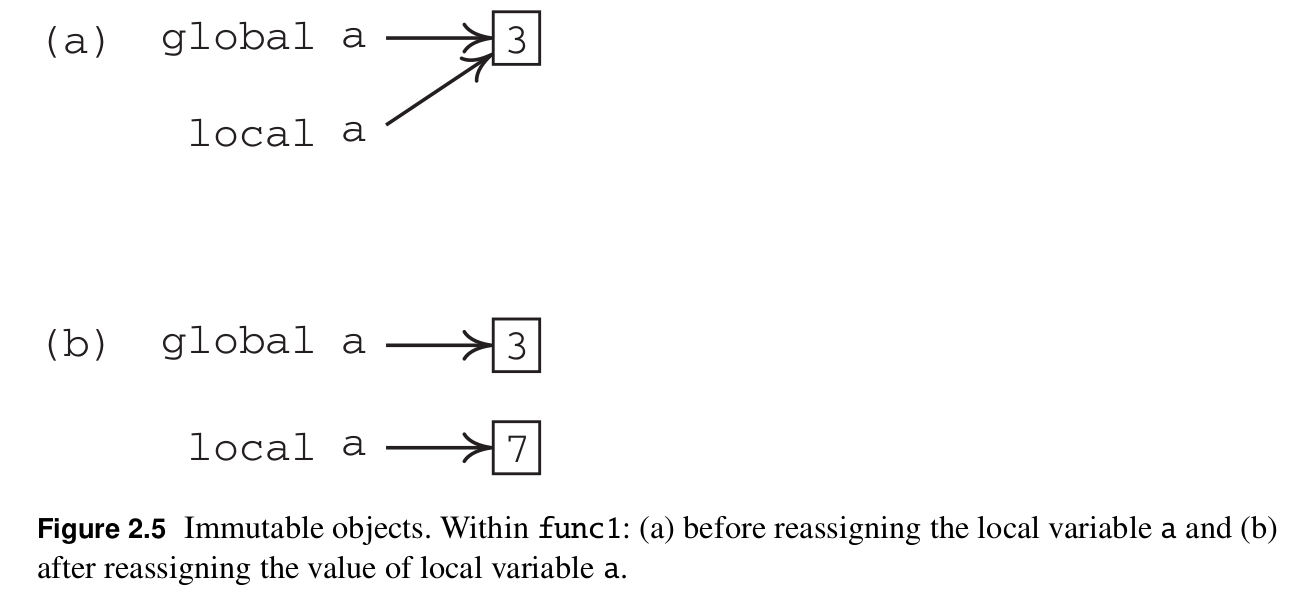

Se o objeto passado como argumento for mutável (lista, por exemplo), o comportamento é diferente:

In [ ]:
def func2(b):
    print('func2: b = {}, id = {}'.format(b, id(b)))
    b.append(7) # add an item to the list
    print('func2: b = {}, id = {}'.format(b, id(b)))

In [ ]:
c = [1, 2, 3]
print('global : c = {}, id = {}'.format(c, id(c)))

global : c = [1, 2, 3], id = 137544266509504


In [ ]:
func2(c)

func2: b = [1, 2, 3], id = 137544266509504
func2: b = [1, 2, 3, 7], id = 137544266509504


In [ ]:
print('global : c = {}, id = {}'. format (c, id(c)))

global : c = [1, 2, 3, 7], id = 137544266509504


Note que nesse caso, não existe diferença entre *c* ser local ou global.

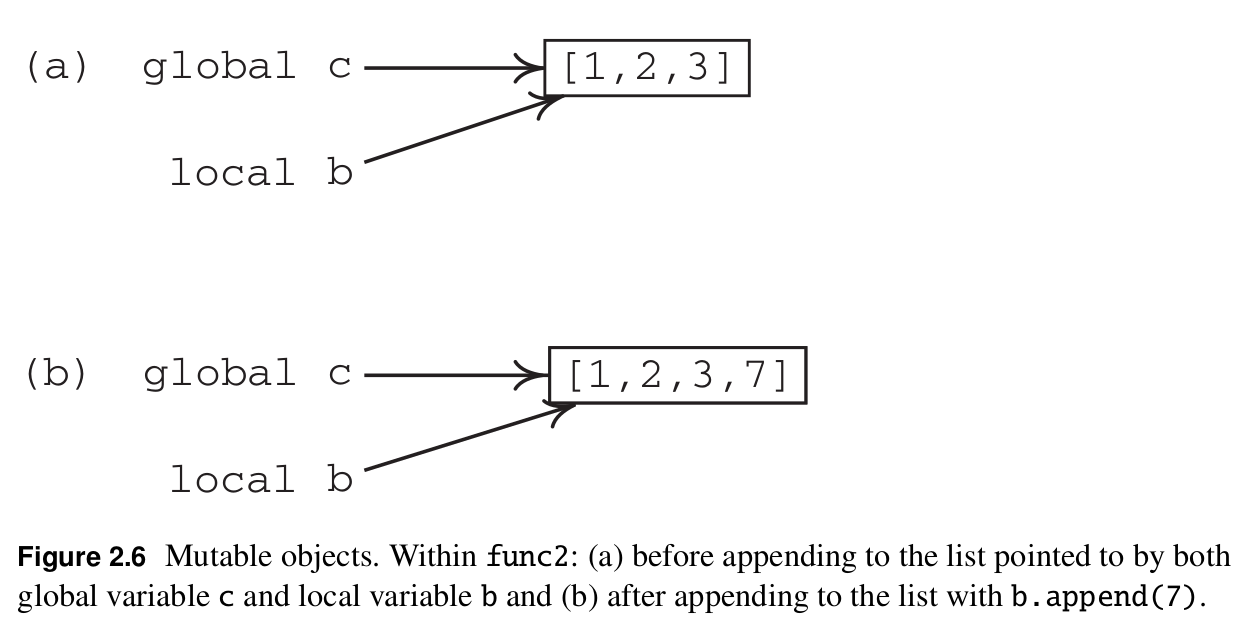

**Funções recursivas**


Funções recursivas são funções que chamam a si mesmas. Esse tipo de recurso normalmente não é necessário, mas torna mais elegante a solução de alguns problemas e costuma produzir códigos mais eficientes.

**Cuidado para não cair em loops infinitos!**

Um exemplo clássico é o cálculo do fatorial

$$
n!= n\times(n-1)\times(n-2)\dots\times(1)
$$

Note que a própria definição do fatorial implica que:

$$
\begin{align}
n! &= n\times(n-1)!\\
%(n-1)! &= (n-1)\times(n-2)!\\
%(n-2)! &= (n-2)\times(n-3)!\\
%&\vdots\\
\end{align}
$$
representando um recursão: conhecendo $(n-1)!$ podemos calcular $n!$ multiplicando o primeiro por $n$.

Código não recursivo:


In [ ]:
def usual_fatorial(n):
    res = 1
    for i in range(1,n+1):
        res *= i
    return res

In [ ]:
usual_fatorial(5)

120

In [ ]:
def fatorial(n):
    #print('->',n)
    if n==1:
        return 1
    return n*fatorial(n-1)

In [ ]:
fatorial(5)

120

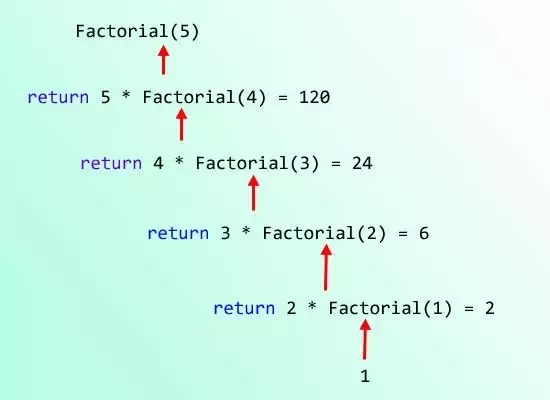

In [ ]:
%%timeit
usual_fatorial(12)

637 ns ± 176 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
fatorial(12)

947 ns ± 43.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Exemplo: Sequência de Fibonacci revisitada. Lembrando que:

$$
a_i = a_{i-1} + a_{i-2}
$$
com $a_0=a_1=1$.

In [ ]:
def fib_usual(n):
    a, b = 1, 1
    seq = [a,b]
    for i in range(2,n+1):
        a, b = b, a+b
        seq += [b]
    return seq

In [ ]:
fib_usual(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [ ]:
def fib_recursiva(n):
    if n in (0,1):
        return 1
    return fib_recursiva(n-1)+fib_recursiva(n-2)

In [ ]:
fib_recursiva(4)

5

In [ ]:
[fib_recursiva(n) for n in range(10+1)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [ ]:
%%timeit
fib_usual(10)

868 ns ± 6.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
[fib_recursiva(n) for n in range(10+1)]

33.5 µs ± 537 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note que nesse caso, a solução recursiva é muito mais lenta!

Isso ocorre porque cada ver que chamamos *fib_recursiva(n)* ela precisa calcular a sequência até $n$. Já a versão recursiva sempre salva o resultado anterior e por isso é muito mais eficiente.


# Cap. 3 - Interlúdio: Gráficos simples com o Matplotlib e NumPy

Neste capítulo, veremos como construir gráficos simples.

Voltaremos a esse ponto no Cap. 7, que é dedicado ao módulo matplotlib. Por hora, nosso foco é introduzir os gráficos mais simples.

Para isso, vamos usar também o numpy para gerar dados sintéticos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## *Gráficos simples*

**Line plots e scatter plots**

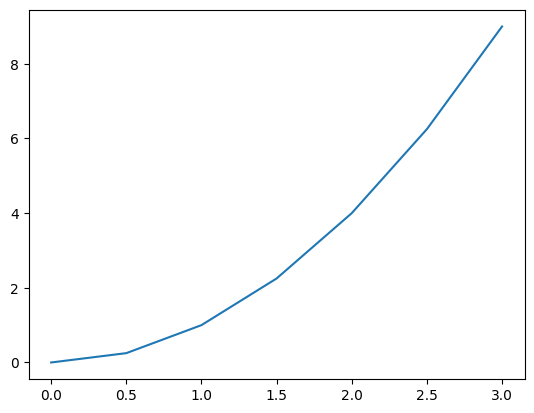

In [ ]:
x = [0.,  0.5,  1.0, 1.5,  2.0, 2.5,  3.0]
y = [0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0]
plt.plot(x, y)

No livro, você vai notar que temos sempre um

```
plt.show()
```
Esse comando é usado para mostrar o gráfico quando se está usando o Python em linha de comando. No colab ou no jupyter, não precisamos disso. Se você usar, nada muda:


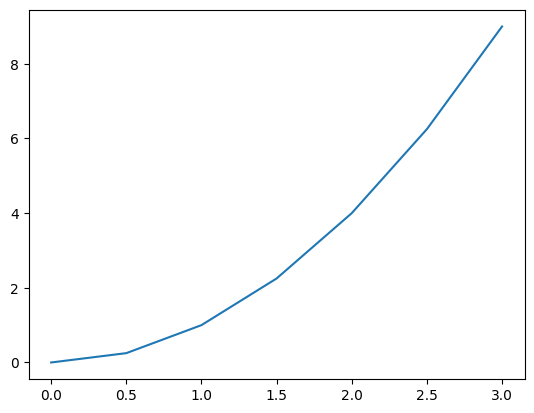

In [ ]:
x = [0.,  0.5,  1.0, 1.5,  2.0, 2.5,  3.0]
y = [0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0]
plt.plot(x, y)
plt.show()

In [ ]:
import random
random.random()

0.7408478440529198

In [ ]:
import random

x,y = [],[]

for _ in range(100):
    x.append(random.random())
    y.append(random.random())

In [ ]:
y[:5]

[0.6112200379035226,
 0.35906117689070216,
 0.6015261982050758,
 0.17552973507120617,
 0.07542085803783738]

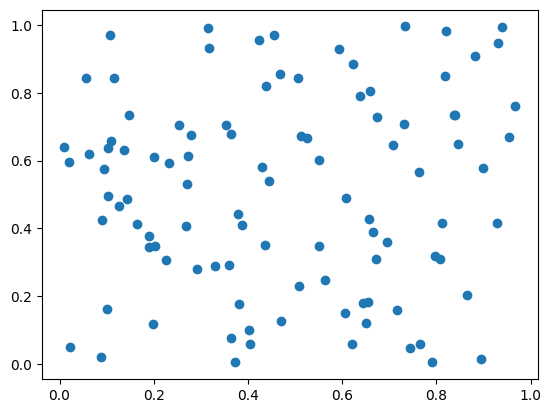

In [ ]:
plt.scatter(x,y)

Uma outra maneira, usando o numpy, seria:

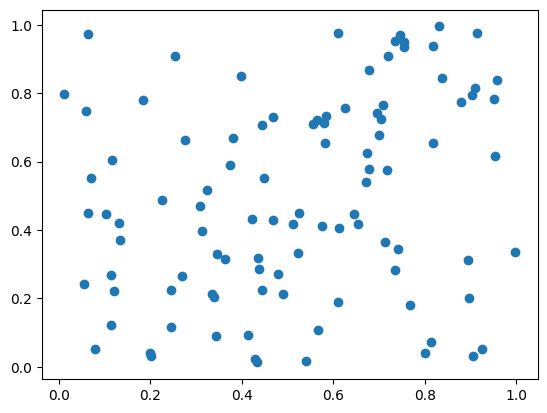

In [ ]:
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)

plt.scatter(x,y)

Podemos salvar os gráficos usando:


```
plt.savefig('NOME_DO_ARQUIVO.png')
plt.savefig('NOME_DO_ARQUIVO.pdf')
```

Existem outros formatos:

In [ ]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

*Exemplo E3.1:* Gráfico de

$$
y = \sin^2(x)\qquad\text{-2$\pi$< x<2$\pi$}
$$

Primeiro, vamos fazer sem o uso no numpy. Para tal, temos que gerar os valores de x e y.

In [ ]:
import math

xmax = 2.*math.pi
xmin = -xmax
n = 1000
dx = (xmax-xmin)/(n-1)

x,y = [],[]

for i in range(n):
    x_ = xmin+i*dx
    x.append(x_)
    y.append(math.sin(x_)**2)

In [ ]:
x[:10]

[-6.283185307179586,
 -6.270606357615663,
 -6.25802740805174,
 -6.245448458487817,
 -6.232869508923894,
 -6.220290559359971,
 -6.207711609796048,
 -6.195132660232124,
 -6.182553710668201,
 -6.169974761104278]

In [ ]:
y[:10]

[5.99903913064743e-32,
 0.00015822162673309918,
 0.0006327863705997201,
 0.0014233938859768039,
 0.002529543808035589,
 0.00395053606941576,
 0.005685471343288633,
 0.007733251612529132,
 0.010092580864635398,
 0.0127619659119585]

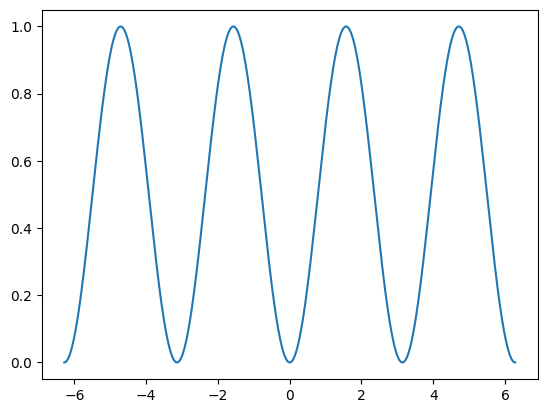

In [ ]:
plt.plot(x,y)

***linspace* e vetorização numpy**

A função *linspace* do numpy pode ser usada para gerar listas de valores igualmente espaçados:

In [ ]:
np.linspace(1,10)

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [ ]:
np.linspace(1,10,num=10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Além disso, o retorno dessa função é um *array* do numpy. Esse é um objeto especial que permite vetorização, ou seja, aplicar uma operação em todos os elementos da lista:

In [ ]:
np.linspace(1,10,num=10)**2

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

Você pode construir um *np.array* usando:

In [ ]:
w = np.array([1,2,3,4])

In [ ]:
w

array([1, 2, 3, 4])

In [ ]:
w*100

array([100, 200, 300, 400])

Usando essas ideias, nosso gráfico anterior poderia ser construído via:

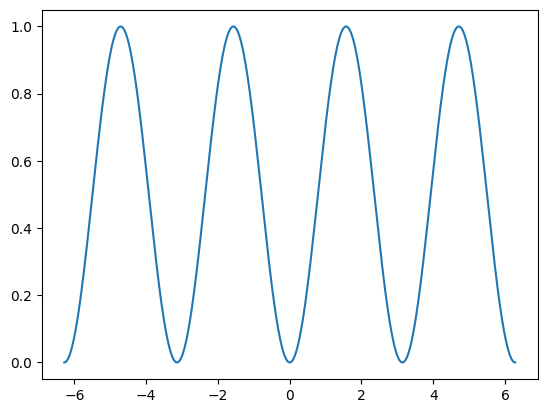

In [ ]:
n = 1000
x = np.linspace(-2*np.pi,2*np.pi,num=n)
y = np.sin(x)**2

plt.plot(x,y)

Para adicionar uma nova curva no mesmo gráfico, basta chamar *plt.plot* novamente:

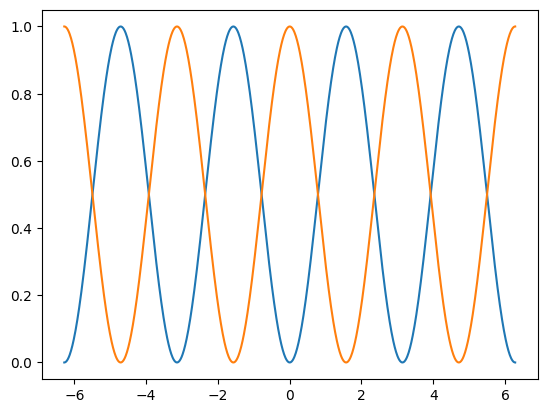

In [ ]:
n = 1000
x = np.linspace(-2*np.pi,2*np.pi,num=n)
y1 = np.sin(x)**2
y2 = np.cos(x)**2

plt.plot(x,y1)
plt.plot(x,y2)
plt.savefig('sin_cos.pdf')

*Exemplo E3.2:* Função *sinc*:

$$
\text{sinc}(x) = \frac{\sin x}{x}
$$

Vamos fazer um gráfico dessa função.

In [ ]:
x = np.linspace(-20,20,num=1001)
y = np.sin(x)/x

<ipython-input-109-9309888e2d75>:2: RuntimeWarning: invalid value encountered in divide
  y = np.sin(x)/x


Note a mensagem informando que surgiu um valor inválido na divisão. Qual será esse valor?

In [ ]:
x[498:503], y[498:503]

(array([-0.08, -0.04,  0.  ,  0.04,  0.08]),
 array([0.99893367, 0.99973335,        nan, 0.99973335, 0.99893367]))

Aqui o *nan* (*not a number*) indica o problema ao dividir por zero. Porém, por padrão, a função *plt.plot* ignora esse tipo de valor especial.

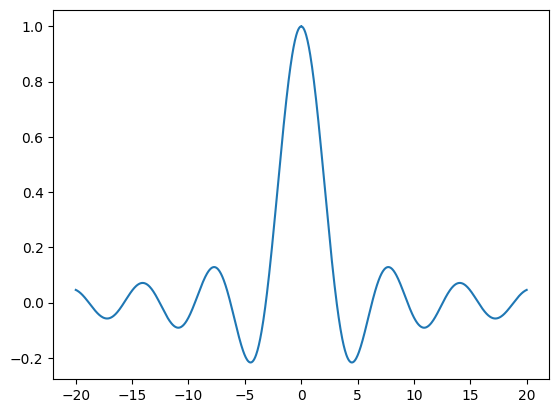

In [ ]:
plt.plot(x,y)

*Problema 3.1.3:* Distribuição gaussiana:

$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}
$$
Aqui, $\mu$ é média da distribuição e $\sigma$ é o desvio padrão.

Vamos fazer uma função que retorne os valores dessa função e depois o seu gráfico.

In [ ]:
def gauss(mu=0, sigma=1, xmin=-10, xmax=10, num=1000):
    """
    Retorna os valores da distribuição gaussiana com média mu
    e desvio padrão sigma usando num pontos entre xmin e xmax.
    """
    x = np.linspace(xmin,xmax,num)
    y = np.exp((-1.*(x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

    return x,y

In [ ]:
gauss(num=10)

(array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
         -1.11111111,   1.11111111,   3.33333333,   5.55555556,
          7.77777778,  10.        ]),
 array([7.69459863e-23, 2.91636853e-14, 7.92199799e-08, 1.54227900e-03,
        2.15192461e-01, 2.15192461e-01, 1.54227900e-03, 7.92199799e-08,
        2.91636853e-14, 7.69459863e-23]))

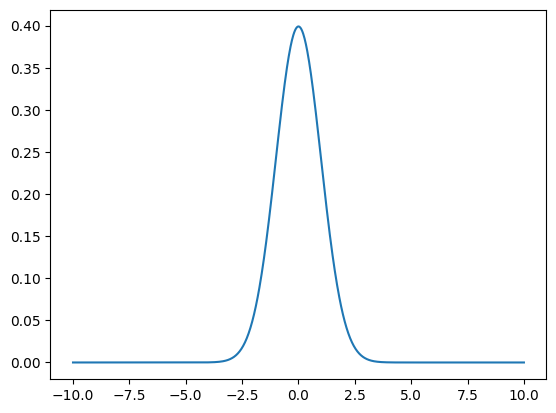

In [ ]:
plt.plot(*gauss())

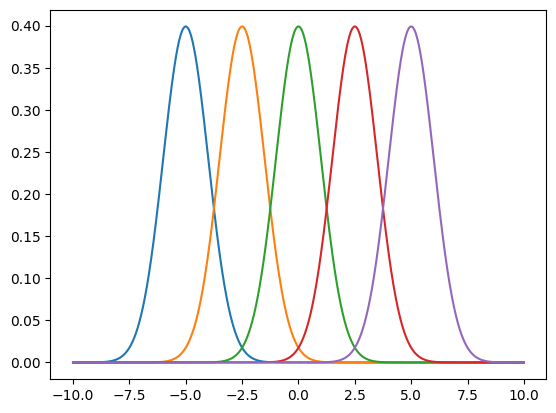

In [ ]:
for mu in [-5,-2.5,0,2.5,5]:
    plt.plot(*gauss(mu=mu))

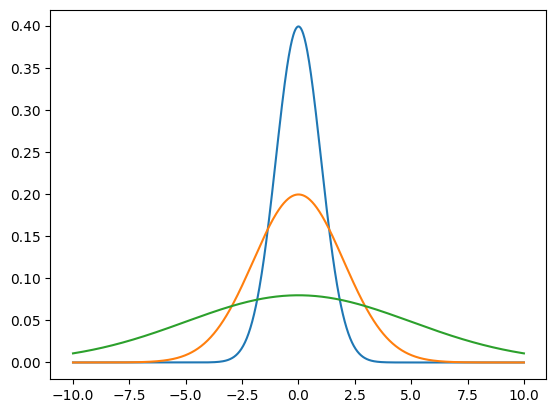

In [ ]:
for sigma in [1,2,5]:
    plt.plot(*gauss(sigma=sigma))

## **Labels, legendas e outras customizações**

**Legenda para mais uma curva**

Para isso, devemos passar o argumento "label" para a função plt.plot e usar plt.legend():

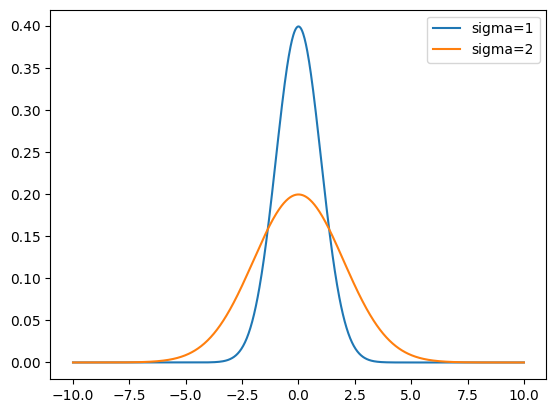

In [ ]:
plt.plot(*gauss(sigma=1), label="sigma=1")
plt.plot(*gauss(sigma=2), label="sigma=2")
plt.legend()

A posição da legenda pode ser modificada por meio do parâmetro *loc*:

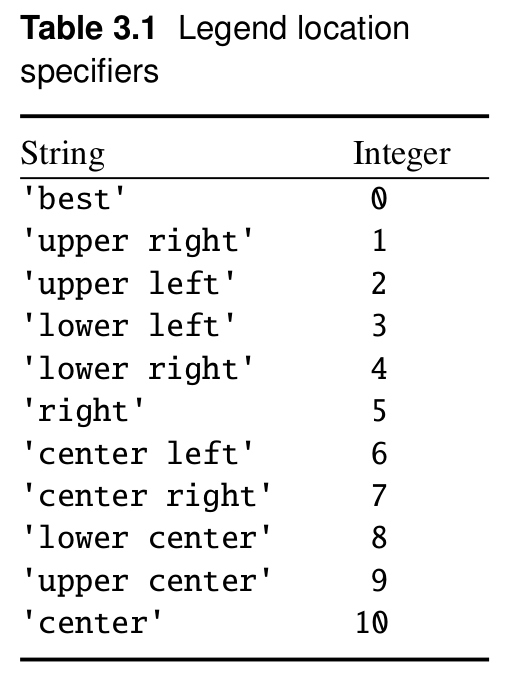

Pode ser usado string ou o inteiro correspondente:

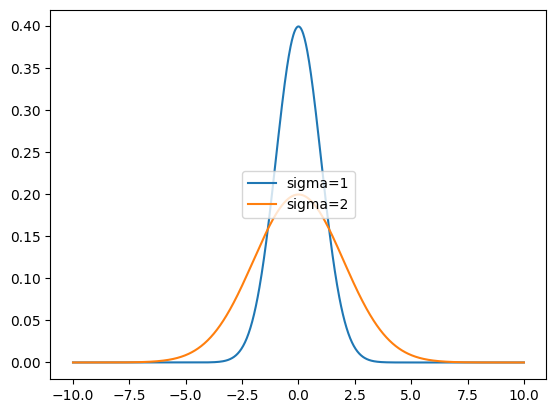

In [ ]:
plt.plot(*gauss(sigma=1), label="sigma=1")
plt.plot(*gauss(sigma=2), label="sigma=2")
plt.legend(loc='center')

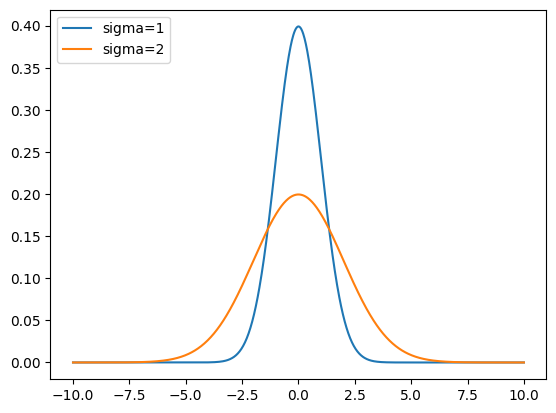

In [ ]:
plt.plot(*gauss(sigma=1), label="sigma=1")
plt.plot(*gauss(sigma=2), label="sigma=2")
plt.legend(loc=2)

**Título para o gráfico e para os eixos**

Para isso, usamos:

* *plt.title*: título para o gráfico;
* *plt.xlabel*: título para o eixo x;
* *plt.ylabel*: título para o eixo y;

Text(0, 0.5, 'Distribuição p(x)')

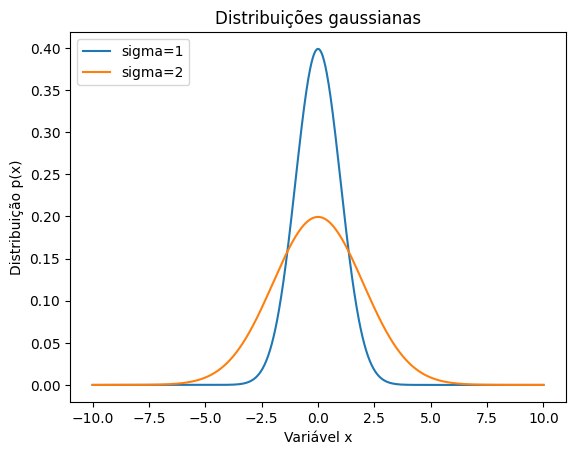

In [ ]:
plt.plot(*gauss(sigma=1), label="sigma=1")
plt.plot(*gauss(sigma=2), label="sigma=2")
plt.legend(loc=2)

plt.title('Distribuições gaussianas')
plt.xlabel('Variável x')
plt.ylabel('Distribuição p(x)')

Podemos usar LaTeX via $$:

Text(0, 0.5, 'Distribuição $p(x)$')

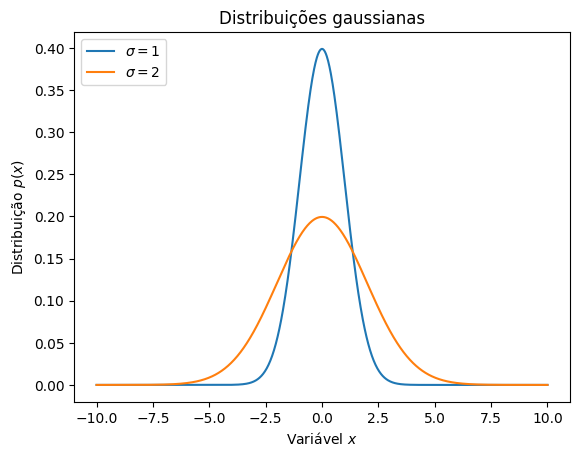

In [ ]:
plt.plot(*gauss(sigma=1), label="$\sigma=1$")
plt.plot(*gauss(sigma=2), label="$\sigma=2$")
plt.legend(loc=2)

plt.title('Distribuições gaussianas')
plt.xlabel('Variável $x$')
plt.ylabel('Distribuição $p(x)$')

Text(0, 0.5, 'Distribuição $p(x)$')

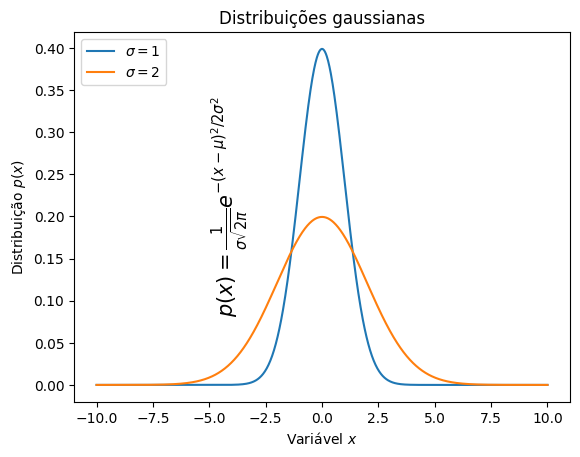

In [ ]:
plt.plot(*gauss(sigma=1), label="$\sigma=1$")
plt.plot(*gauss(sigma=2), label="$\sigma=2$")
plt.legend(loc=2)

#para expressões mais complexas devemos usar r"" para
#garantir que o código LaTeX seja lido de maneira correta
plt.text(-5,0.1,
         r'$p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}$',
         fontsize=15,rotation=90)
plt.title('Distribuições gaussianas')
plt.xlabel('Variável $x$')
plt.ylabel('Distribuição $p(x)$')

*Exemplo E3.3:* Gráfico da função

$$
f_n(x) = x^n \sin x
$$

para $n=1,2,3,4$.

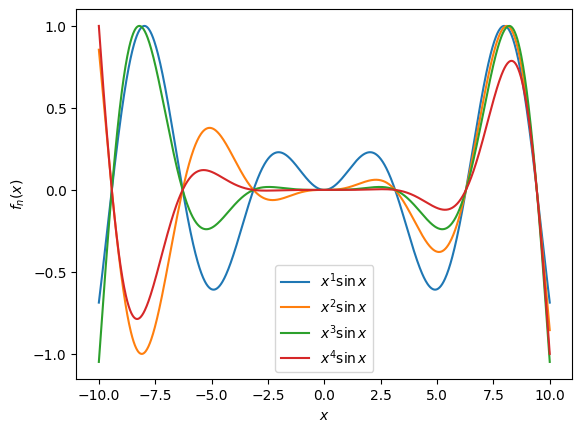

In [ ]:
x = np.linspace(-10,10,1000)

for n in range(1,4+1):
    y = x**n * np.sin(x)
    #normaliza pelo máximo
    y = y/max(y)
    plt.plot(x,y,label=fr"$x^{n}\sin x$")
plt.xlabel('$x$')
plt.ylabel('$f_n(x)$')
plt.legend(loc='lower center')


**Tipo de marcador**

Por padrão, *plt.plot* faz gráficos de linha sem incluir nenhum marcador ou símbolo. Isso pode ser modificado alterando o argumento *marker*:

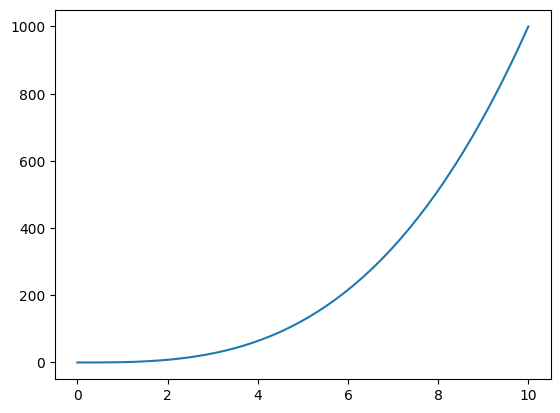

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y)

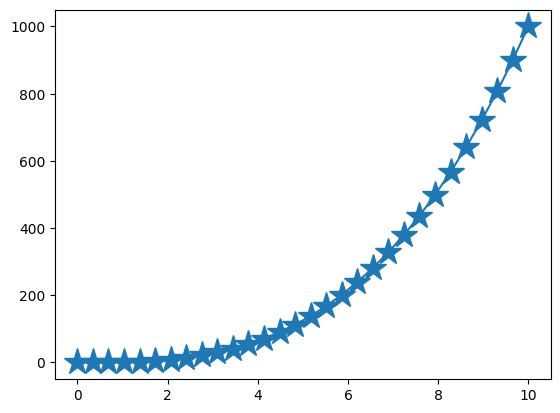

In [ ]:
x = np.linspace(0,10,num=30)
y = x**3

plt.plot(x,y,marker='*',ms=20)

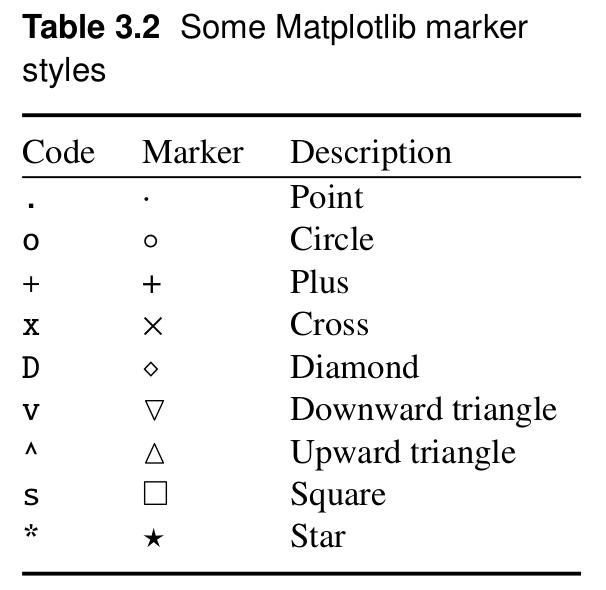

**Cores**

Podemos especificar as cores das curvas usando o argumento *color*:

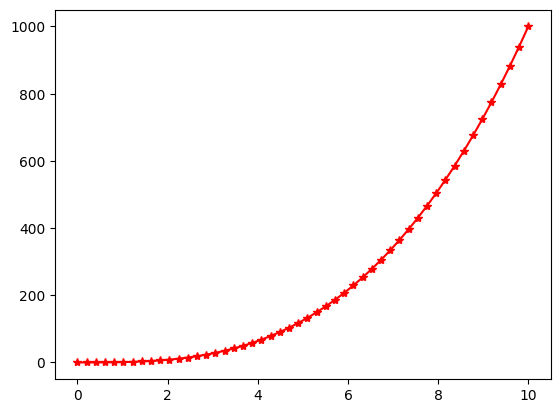

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y,marker='*',color='red')

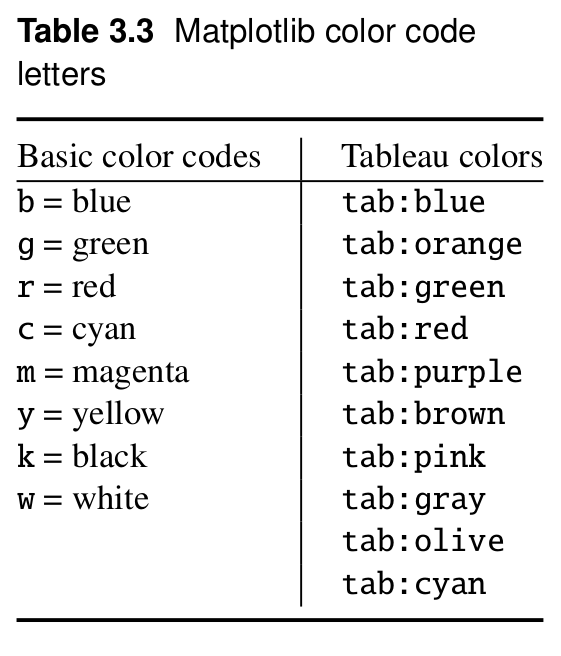

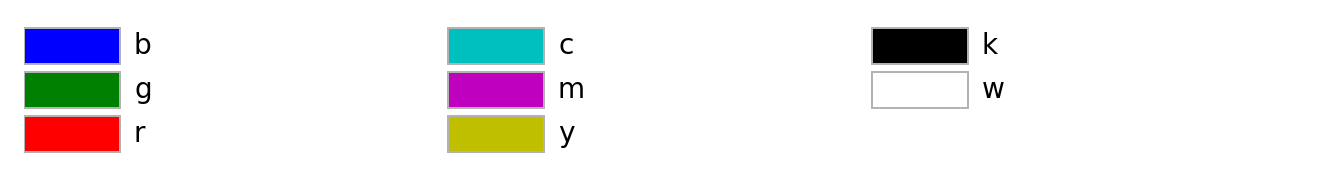

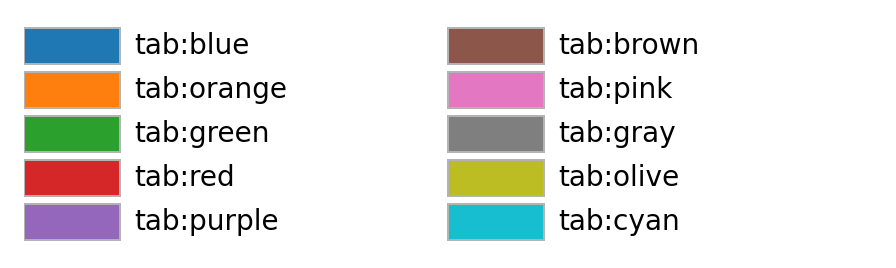

Veja mais em [named_colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

Também podemos passar cores no padrão RGB ou RGBA via tuplas ou strings como o código HEX de cores.

Recomendo usar o [colorbrewer](http://colorbrewer2.org/) para escolher corres.



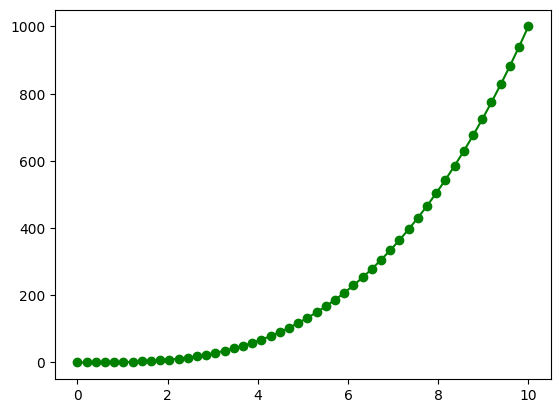

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y,marker='o',color=(0.,0.5,0.,))

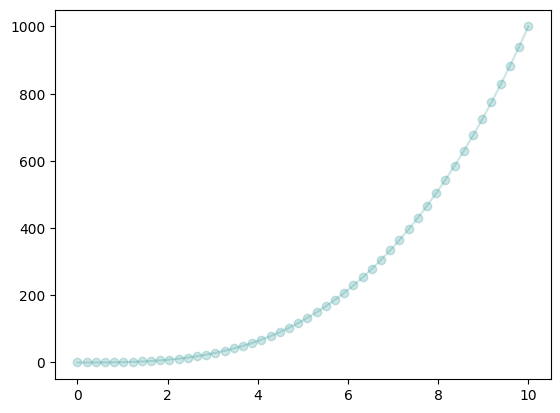

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y,marker='o',color=(0.,0.5,0.5,0.2))

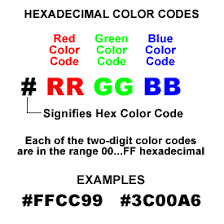

In [ ]:
for i in range(1,16*16):
    print(f"{i:3d},{str(hex(i)[2:]):>3s}", end=' | ')
    if not i%8:
        print()

  1,  1 |   2,  2 |   3,  3 |   4,  4 |   5,  5 |   6,  6 |   7,  7 |   8,  8 | 
  9,  9 |  10,  a |  11,  b |  12,  c |  13,  d |  14,  e |  15,  f |  16, 10 | 
 17, 11 |  18, 12 |  19, 13 |  20, 14 |  21, 15 |  22, 16 |  23, 17 |  24, 18 | 
 25, 19 |  26, 1a |  27, 1b |  28, 1c |  29, 1d |  30, 1e |  31, 1f |  32, 20 | 
 33, 21 |  34, 22 |  35, 23 |  36, 24 |  37, 25 |  38, 26 |  39, 27 |  40, 28 | 
 41, 29 |  42, 2a |  43, 2b |  44, 2c |  45, 2d |  46, 2e |  47, 2f |  48, 30 | 
 49, 31 |  50, 32 |  51, 33 |  52, 34 |  53, 35 |  54, 36 |  55, 37 |  56, 38 | 
 57, 39 |  58, 3a |  59, 3b |  60, 3c |  61, 3d |  62, 3e |  63, 3f |  64, 40 | 
 65, 41 |  66, 42 |  67, 43 |  68, 44 |  69, 45 |  70, 46 |  71, 47 |  72, 48 | 
 73, 49 |  74, 4a |  75, 4b |  76, 4c |  77, 4d |  78, 4e |  79, 4f |  80, 50 | 
 81, 51 |  82, 52 |  83, 53 |  84, 54 |  85, 55 |  86, 56 |  87, 57 |  88, 58 | 
 89, 59 |  90, 5a |  91, 5b |  92, 5c |  93, 5d |  94, 5e |  95, 5f |  96, 60 | 
 97, 61 |  98, 62 |  99, 63 

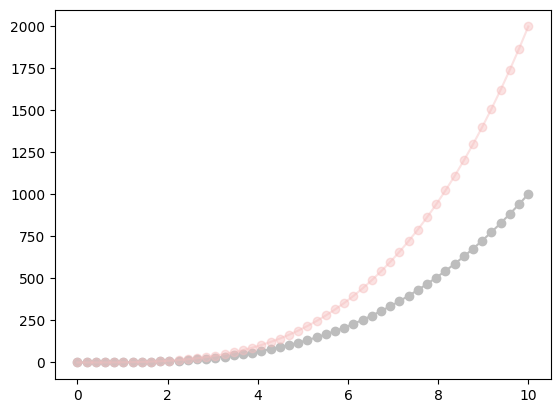

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y,marker='o',color='#bdbdbd')
#tambem podemos usar alpha (transparencia)
plt.plot(x,y**1.1,marker='o',color='#f6bdbd70')

**Estilo e largura das linhas**

Por padrão, a função *plt.plot* usa linhas sólidas com largura de 1.5pt. Os argumentos

* *linestyle* (ls)
* *linewidth* (lw)

permitem modificar esse comportamento.

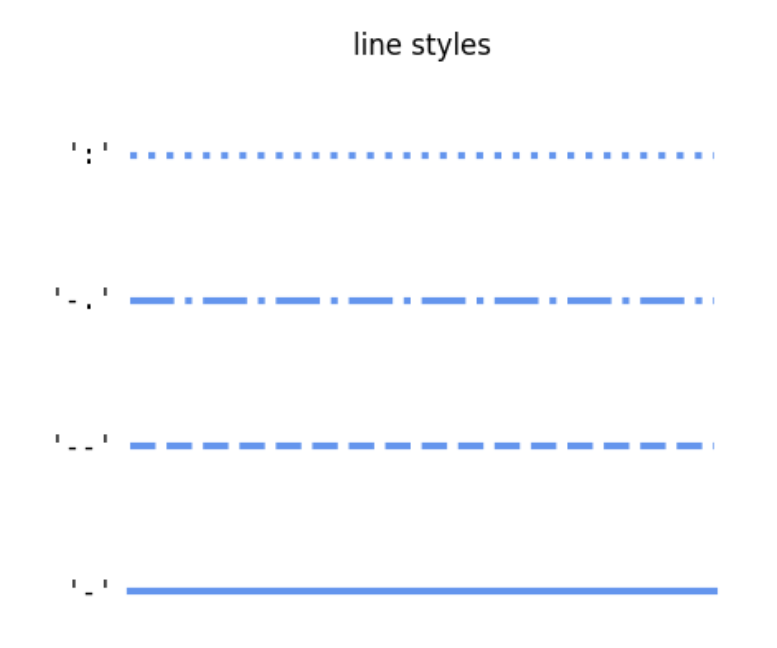

In [ ]:
x = np.linspace(0,10)
y = x**3

plt.plot(x,y,ls='--')
plt.plot(x,y*1.1,ls='-.',lw=5)

In [ ]:
x = np.linspace(-10,10,1000)

ls = ['-','--',':','-.']

for n in range(1,4+1):
    y = x**n * np.sin(x)
    #normaliza pelo máximo
    y = y/max(y)
    plt.plot(x,y,label=fr"$x^{n}\sin x$",ls=ls[n-1])
plt.xlabel('$x$')
plt.ylabel('$f_n(x)$')
plt.legend(loc='lower center')


**Limites do gráfico**

Por padrão, *plt.plot* mostra todo o range de valores dos eixos *x* e *y*. Mas isso pode ser alterado usando os métodos:

* plt.xlim(xmin,xmax)
* plt.ylim(ymin,ymax)

Por exemplo:


In [ ]:
t = np.linspace (0, 2, 1000)
f = t*np.exp(t + np.sin(20*t))
plt.plot(t, f)

In [ ]:
t = np.linspace (0, 2, 1000)
f = t*np.exp(t + np.sin(20*t))
plt.plot(t, f)
plt.ylim(0,30)

In [ ]:
t = np.linspace (0, 2, 1000)
f = t*np.exp(t + np.sin(20*t))
plt.plot(t, f)
plt.ylim(0,30)
plt.xlim(1.5,1.8)

*Exemplo E3.4:* Lei de Moore. Essa lei afirma que o número de transistores em processadores de computadores tem dobrado, aproximadamente, a cada 2 anos. Matematicamente, podemos escrever

$$
n_i = n_0 2^{(y_i-y_0)/T_2}
$$

Com $n_i$ sendo o número de transistores no ano $y_i$, $n_0$ o número de transistores no ano referência $y_0$ e $T_2\approx2$ o *doubling time*.

Os dados abaixo representam o número de transistores entre 1972 e 2012.

In [ ]:
anos = [1972, 1974, 1978, 1982, 1985, 1989, 1993,
        1997, 1999, 2000, 2003 ,2004, 2007, 2008, 2012]

#em milhões (x1e6)
ntrans = [0.0025, 0.005, 0.029, 0.12, 0.275, 1.18, 3.1,
          7.5, 24.0, 42.0, 220.0, 592.0, 1720.0, 2046.0, 3100.0]

Podemos fazer o gráfico:

In [ ]:
#converte para np.array
anos = np.array(anos)
ntrans = np.array(ntrans)*1.e6

In [ ]:
plt.plot(anos,ntrans,marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de transistores')

Note que essa representação não é boa, uma vez que os números são muito diferentes entre si. Entretanto, assumindo que a Lei de Moore seja verdadeira, temos:

$$
\begin{split}
\log_{10} n_i &= \log_{10}[ n_0 2^{(y_i-y_0)/T_2}]\\
\log_{10} n_i &= \log_{10}n_0 +  \frac{y_i-y_0}{T_2} \log_{10} 2\\
\end{split}
$$

Ou seja, o $\log_{10} n_i$ é uma função linear do tempo $y_i$. Podemos verificar isso:

In [ ]:
plt.plot(anos, np.log10(ntrans),marker='o')
plt.xlabel('Ano')
plt.ylabel('$log_{10}$ do número de transistores')

O gráfico anterior é mais fácil de visualizar. Podemos incluir também a previsão da Lei de Moore:

In [ ]:
#doubling time
t2 = 2
#valores iniciais
n0,ano0 = ntrans[0],anos[0]
#range para função
anos_ls = np.linspace(1970,2013)
#previsão
pred_ntrans = n0*2**((anos_ls - ano0)/t2)

In [ ]:
plt.plot(anos_ls, np.log10(pred_ntrans))
plt.xlabel('Ano')
plt.ylabel('$log_{10}$ do número de transistores')

Combinando os dados com a teoria:

In [ ]:
plt.plot(anos, np.log10(ntrans),marker='o')
plt.plot(anos_ls, np.log10(pred_ntrans))

plt.xlabel('Ano')
plt.ylabel('$log_{10}$ do número de transistores')

Juntando tudo e customizando:

In [ ]:
anos = [1972, 1974, 1978, 1982, 1985, 1989, 1993,
        1997, 1999, 2000, 2003 ,2004, 2007, 2008, 2012]

#Em milhões - 1e6
ntrans = [0.0025, 0.005, 0.029, 0.12, 0.275, 1.18, 3.1,
          7.5, 24.0, 42.0, 220.0, 592.0, 1720.0, 2046.0, 3100.0]

#converte para np.array
anos = np.array(anos)
ntrans = np.array(ntrans)*1.e6

#doubling time
t2 = 2
#valores iniciais
n0,ano0 = ntrans[0],anos[0]
#range para função
anos_ls = np.linspace(1970,2013)
#previsão
pred_ntrans = n0*2**((anos_ls - ano0)/t2)

plt.plot(anos, np.log10(ntrans),
         marker='s',
         label='Observado',
         lw=0,
         ms=10,
         markeredgecolor='#202020',
         c='#fc9272')

plt.plot(anos_ls, np.log10(pred_ntrans),
         label='Predito',
         c='#202020',
         lw=2,
         ls='--')

plt.legend()

plt.xlabel('Ano')
plt.ylabel('$log_{10}$ do número de transistores')

## **Gráficos polares e histogramas**

**Gráfico polares**

Para fazer um gráfico em coordenadas polares $(r,\theta)$ podemos usar a função *plt.polar*.

*Exemplo E3.5:* Cardioide:

$$
r = 2 a (1-\cos\theta)
$$

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/d/d0/Cardiod_animation.gif')

In [ ]:
theta = np.linspace(0, 2.* np.pi , 1000)
a = 1.
r = 2 * a *(1. + np.cos(theta))
plt.polar(theta , r)

**Histogramas**

Histogramas são uma maneira para se estimar a distribuição de probabilidade de um dado.

A função *plt.hist* gera um histograma a partir de um dado.

Por exemplo:

In [ ]:
dados_gauss = np.random.normal(size=1000)

In [ ]:
plt.hist(dados_gauss)

Por padrão, a função usa 10 intervalos. Mas isso pode ser alterado usando o parâmetro *bins*:

In [ ]:
plt.hist(dados_gauss, bins=20)

Note que a função retorna o número de ocorrências em cada caixa. Para normalizar o dado de modo que a área abaixo da curva fique unitária, podemos usar o parâmetro *density*.

In [ ]:
plt.hist(dados_gauss, bins=20, density=True)

In [ ]:
def gauss(mu=0, sigma=1, xmin=-10, xmax=10, num=1000):
    """
    Retorna os valores da distribuição gaussiana com média mu
    e desvio padrão sigma usando num pontos entre xmin e xmax.
    """
    x = np.linspace(xmin,xmax,num)
    y = np.exp((-1.*(x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

    return x,y

In [ ]:
plt.hist(dados_gauss, bins=20,
         density=True,
         color='#a1a1a1',
         label='Dados')

plt.plot(*gauss(xmin=-3,xmax=3),
         color='#202020',
         lw=3,
         label='Modelo')

plt.legend()

**Eixos múltiplos**

A função *plt.twinx* gera um "eixo gêmio". Para ilustrar o seu uso, considere o exemplo a seguir.

*Exemplo E3.8:* Um exmplo de correlações espúrias do site: [Spurious Correlations](https://www.tylervigen.com/spurious-correlations).

In [ ]:
years = range(2000, 2010)

divorce_rate = [5.0, 4.7, 4.6, 4.4, 4.3, 4.1, 4.2, 4.2, 4.2, 4.1]
#em lbs
margarine_consumption = [8.2, 7, 6.5, 5.3, 5.2, 4, 4.6, 4.5, 4.2, 3.7]
#em kg
margarine_consumption = 0.453592*np.array(margarine_consumption)

line1 = plt.plot(years,
                 divorce_rate,
                 marker='s',
                 color='blue',
                 markeredgecolor='#202020',
                 label='Taxa de divórcios em Maine')
plt.ylabel('Divórcios por 1000 pessoas')
plt.legend()

plt.twinx ()
line2 = plt.plot(years,
                 margarine_consumption,
                 marker='o',
                 color='red',
                 markeredgecolor='#202020',
                 label='Consumo de margarina',
                 alpha=0.7)

plt.ylabel('Quilos de margarina (per capita)')
plt.legend()

#mostra as legendas em separado
lines = line1 + line2
labels = []
for line in lines:
    labels.append(line.get_label())
plt.legend(lines, labels)


*Problema P3.3.2:* O potencial de Lennard-Jones,

$$
U(r) = \frac{B}{r^{12}} - \frac{A}{r^{6}}
$$
com $A$ e $B$ constantes positivas, representa um potencial típico para interação entre átomos e moléculas a um distância $r$.

Para átomos de argônio:

* $A = 1.024\times 10^{−23}$ J nm$^6$
* $B = 1.582\times 10^{−26}$ J nm$^{12}$

Como sabemos, a força associada a esse potencial pode ser calculada via:

$$
F(r) = -\frac{d}{dr}U = \frac{12 B}{r^{13}} - \frac{6 A}{r^{6}}
$$

Resolvendo

$$
F(r^*)=0
$$

encontramos que o mínimo do potencial é
$$
r^* = \left(\frac{2 B}{A}\right)^{1/6}
$$

Por fim, é muito comum dividir as constantes $A$ e $B$ por $k_b=1.381\times10^{−23}$ J K$^{−1}$, de modo que a unidade de $U(r)$ fica em $K$. Nesse caso:

* $A = 0.741492$ K nm$^6$
* $B = 0.00114555$ K nm$^{12}$

Para o argônio. Vamos fazer os gráficos de $U(r)$ e $F(r)$.

In [ ]:
#constante de Boltzmann (J/K)
kB = 1.381e-23

#parâmetros do argonio
A = 1.024e-23   # J.nm^6
B = 1.582e-26   # J.nm^12

#parâmetros do argonio em unidades ajustadas
A, B = A / kB, B / kB

#range de distâncias (nm)
r = np.linspace(0.3, 1, 1000)
#potencial
U = B/(r**12) - A/(r**6)
#força
F = (12*B)/(r**13) - (6*A)/(r**7)
#posicao do minimo
rstar = (2*B/A)**(1./6)

Urstar = B/(rstar**12) - A/(rstar**6)

line1 = plt.plot(r, U,
                 color='#202020',
                 lw=2,
                 label=r'U(r)')
plt.xlim(0.3, 0.8)
plt.ylim(-150, 100)
plt.xlabel("Distância de separação (nm)")
plt.ylabel("Potencial de Lennard-Jones")
# plt.axvline(rstar,linestyle='dotted')

plt.plot([rstar,rstar],[Urstar,0],color='#707070')

plt.twinx()
line2 = plt.plot(r, F,
                 color='#de2d26',
                 ls=':',
                 lw=2,
                 label=r'F(r)')
plt.xlim(0.3, 0.8)
plt.ylim(-1000, 1000)

lines = line1 + line2
labels = []
for line in lines:
    labels.append(line.get_label())
plt.legend(lines, labels)
plt.ylabel("Força de Lennard-Jones")